# [**SGD : Échantillons pondérés**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_5_sgd/plot_sgd_weighted_samples.ipynb)<br/>([_SGD: Weighted samples_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html))

Trace la fonction de décision d'un ensemble de données pondérées, où la taille des points est proportionnelle à leur poids.

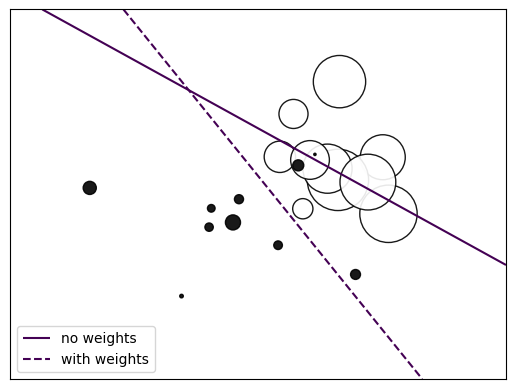

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
fig, ax = plt.subplots()
ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=sample_weight,
    alpha=0.9,
    cmap=plt.cm.bone,
    edgecolor="black",
)

# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["solid"])

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])

no_weights_handles, _ = no_weights.legend_elements()
weights_handles, _ = samples_weights.legend_elements()
ax.legend(
    [no_weights_handles[0], weights_handles[0]],
    ["no weights", "with weights"],
    loc="lower left",
)

ax.set(xticks=(), yticks=())
plt.show()